In [1]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

In [2]:
path = 'C:/Users/Anastasia/Downloads/'
img_path = path + '228963 .jpg'
good_img_path = path + 'tablica.jpg'
cropped_path = path + 'cropped.jpg'
acc_path = path + 'cropped_out.jpg'
aligned_path = path + 'aligned.jpg'

In [3]:
def show(img_path):
    img = cv2.imread(img_path)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()

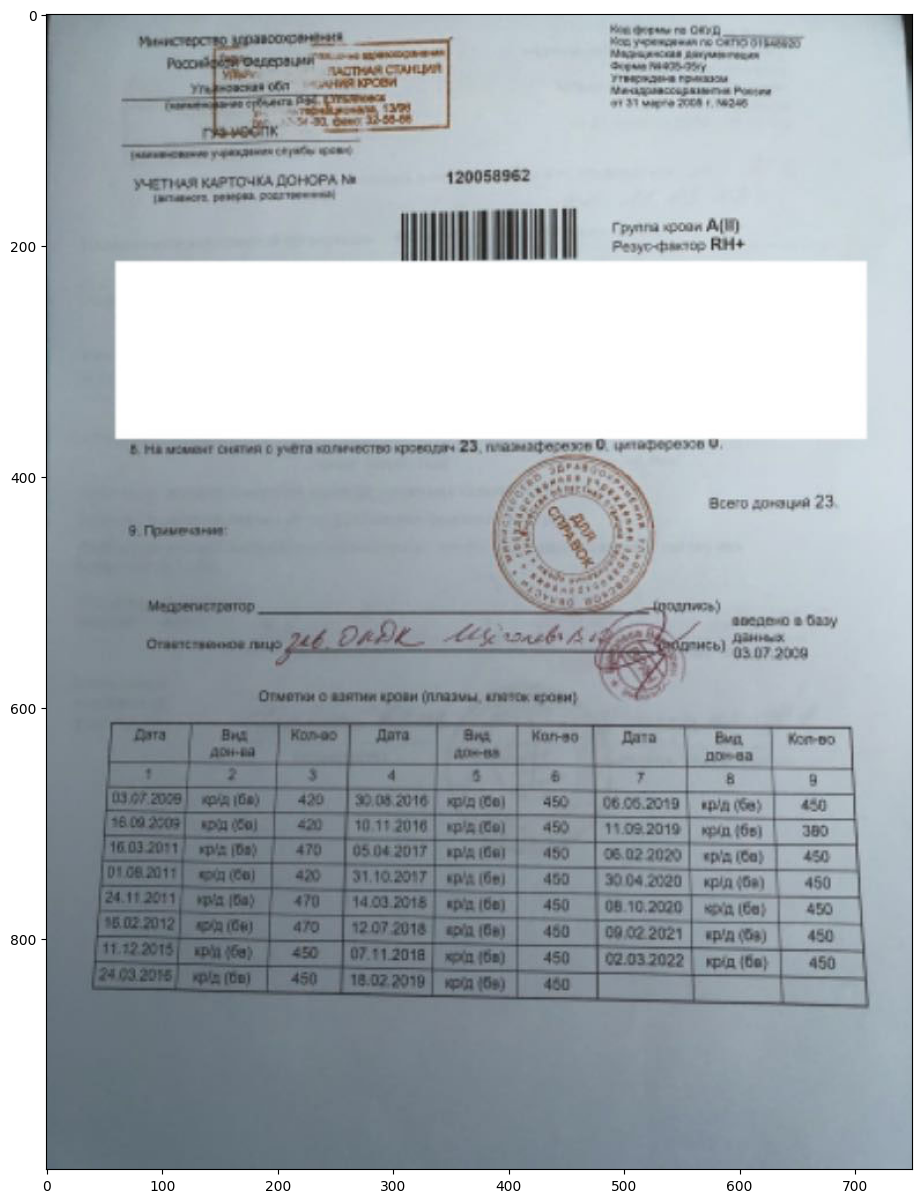

In [4]:
show(img_path)

# Обрезание

In [5]:
def crop(img_path, output_path):
    # Считывание изображения
    img = Image.open(img_path)
    img = np.array(img)
    if img.ndim == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Присвоение изображению порогового значения в виде двоичного изображения
    img_bin = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
    
    # Обнаружение контуров
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Определение самого большого контура
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Обрезание по этому контуру
    x, y, w, h = cv2.boundingRect(largest_contour)
    cropped_image = img[y:y+h, x:x+w]
    
    # Сохранение
    cv2.imwrite(output_path, cropped_image)

In [6]:
%%time 
crop(img_path, cropped_path)

CPU times: total: 62.5 ms
Wall time: 31.9 ms


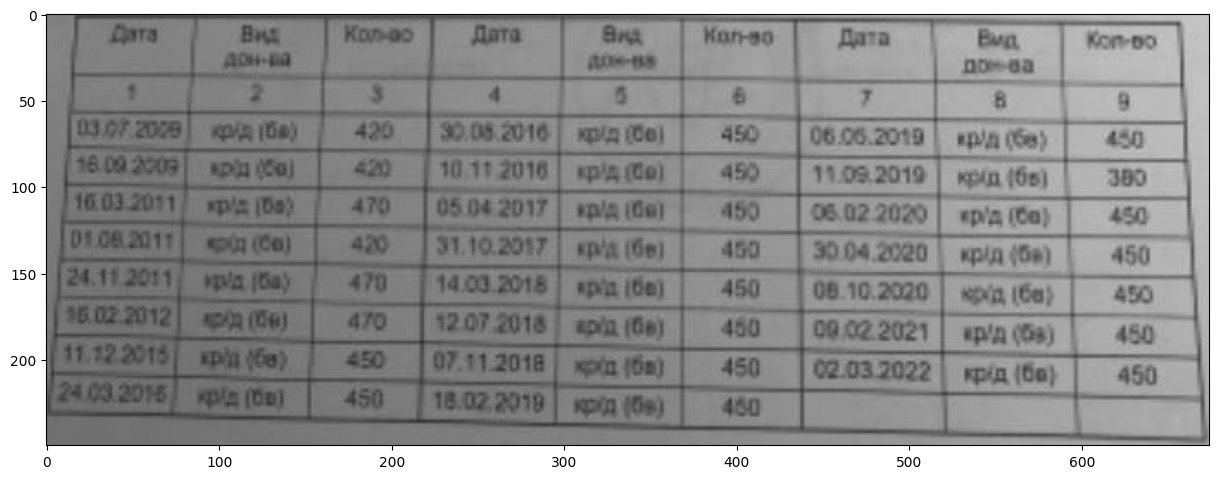

In [7]:
show(cropped_path)

# Увеличение точности

In [8]:
import subprocess

In [9]:
def acc(script_path, model_path, img_path, output_dir):
    command = f'python {script_path} --model_path {model_path} --input {img_path} --output {output_dir} --fp32'
    subprocess.run(command, shell=True)

In [10]:
model_path = path + 'RealESRGAN_x4plus.pth'
script_path = path + 'inference_realesrgan.py'

In [11]:
%%time
acc(script_path, model_path, cropped_path, path)

CPU times: total: 0 ns
Wall time: 57.4 s


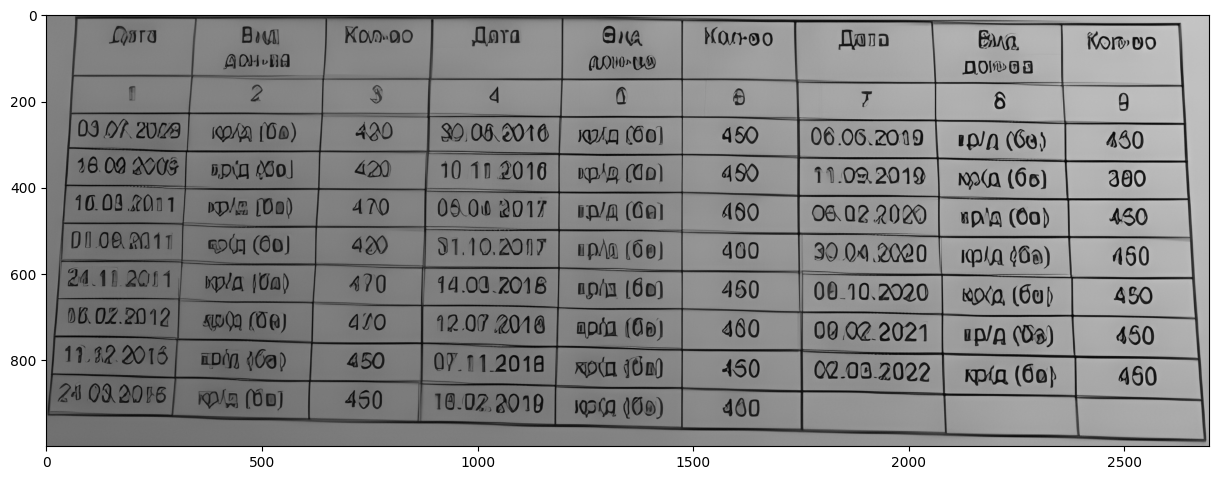

In [12]:
show(acc_path)

# Выравнивание
*работает только с хорошими изображенями

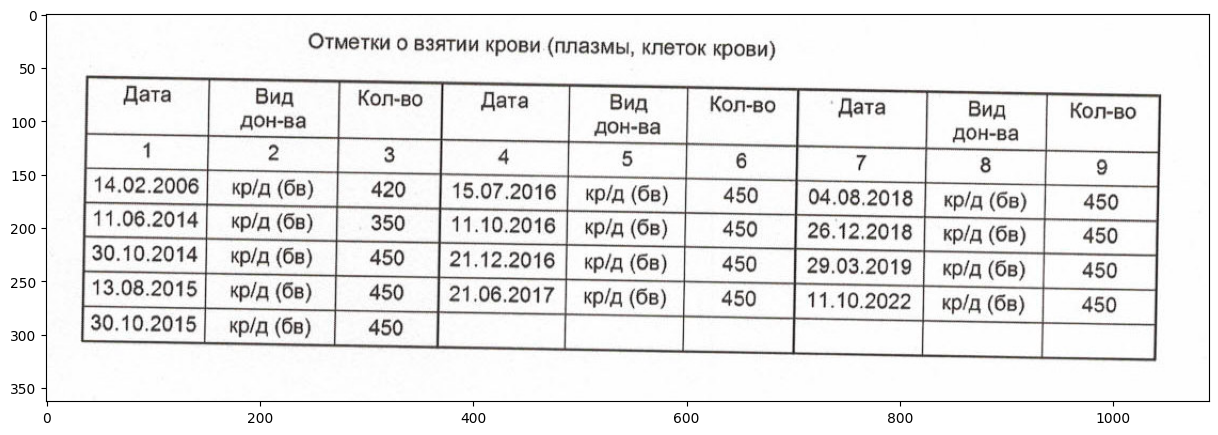

In [13]:
show(good_img_path)

In [14]:
from jdeskew.estimator import get_angle
from jdeskew.utility import rotate

In [15]:
def align(img_path, output_path):
    image = Image.open(img_path)
    image_np = np.array(image)
    angle = get_angle(image_np)
    output_image = rotate(image_np, angle)
    output_image_pil = Image.fromarray(np.uint8(output_image))
    output_image_pil.save(output_path)

In [16]:
%%time
align(good_img_path, aligned_path)

CPU times: total: 1.17 s
Wall time: 1.18 s


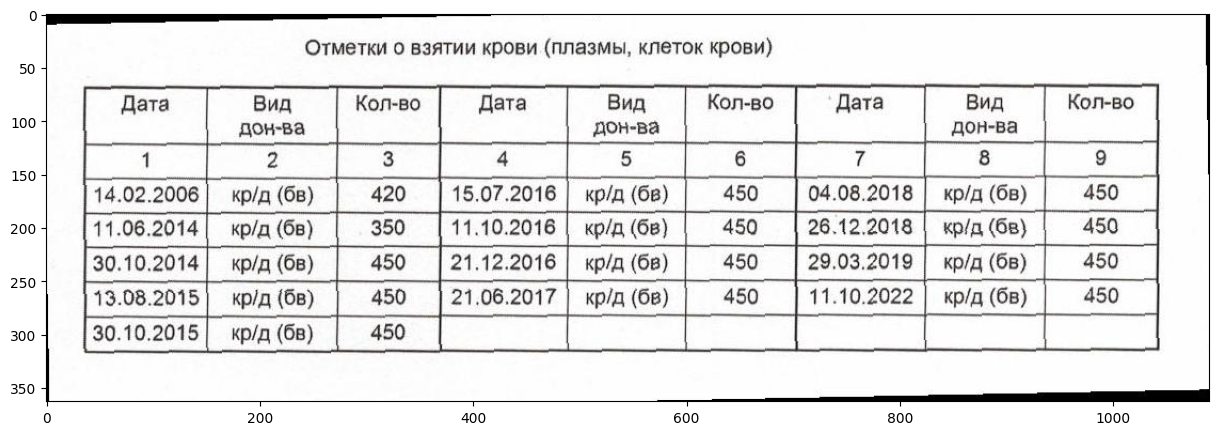

In [17]:
show(aligned_path)